In [10]:
# Dataset Information:

# dataset source: Kaggle

#The dataset consists of 10 numerical and 8 categorical attributes.
#The 'Revenue' attribute can be used as the class label."Administrative", 
#"Administrative Duration", "Informational"
#"Informational Duration", "Product Related" and "Product Related Duration" 
#represent the number of different types
#of pages visited by the visitor in that session and total time spent in 
#each of these page categories. 
#The values of these features are derived from the URL information of 
#the pages visited by the user and updated 
#in real time when a user takes an action, e.g. moving from one page 
#to another. The "Bounce Rate", "Exit Rate" 
#and "Page Value" features represent the metrics measured by 
#"Google Analytics" for each page in the e-commerce 
#site. The value of "Bounce Rate" feature for a web page refers to 
#the percentage of visitors who enter the site 
#from that page and then leave ("bounce") without triggering any 
#other requests to the analytics server during that 
#session. The value of "Exit Rate" feature for a specific web 
#page is calculated as for all pageviews to the page, 
#the percentage that were the last in the session. The 
#"Page Value" feature represents the average value for a web 
#page that a user visited before completing an e-commerce 
#transaction. The "Special Day" feature indicates the 
#closeness of the site visiting time to a specific special 
#day (e.g. Mother’s Day, Valentine's Day) in which 
#the sessions are more likely to be finalized with transaction.
# The value of this attribute is determined by 
#considering the dynamics of e-commerce such as the duration 
#between the order date and delivery date. For 
#example, for Valentina’s day, this value takes a nonzero value 
#between February 2 and February 12, zero before 
#and after this date unless it is close to another special day,
#and its maximum value of 1 on February 8. 
#The dataset also includes operating system, browser, region,
#traffic type, visitor type as returning or 
#new visitor, a Boolean value indicating whether the date of 
#the visit is weekend, and month of the year.

In [11]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.pandas.set_option('display.max_columns', 100)

In [12]:
#reading the file
df=pd.read_csv('/Users/nihal/BACapstone/online_shoppers_intention.csv')

In [13]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [45]:
# statistical description of columns
desc_stats=df.describe()
print("Descriptive statistics for the whole DataFrame: \n", desc_stats)

Descriptive statistics for the whole DataFrame: 
        Administrative  Administrative_Duration  Informational   
count    12330.000000             12330.000000   12330.000000  \
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration   
count            12330.000000    12330.000000             12330.000000  \
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.0000

In [15]:
# t-test
t_stat, p_val = stats.ttest_ind(df['TrafficType'], df['OperatingSystems'])
print("\nT-test results for 'TrafficType' and 'OperatingSystems':")
print("T-statistic:", t_stat)
print("P-value:", p_val)


t_stat, p_val = stats.ttest_ind(df['Browser'], df['Region'])
print("\nT-test results for 'Browser' and 'Region':")
print("T-statistic:", t_stat)
print("P-value:", p_val)

t_stat, p_val = stats.ttest_ind(df['Weekend'], df['Revenue'])
print("\nT-test results for 'Weekend' and 'Revenue':")
print("T-statistic:", t_stat)
print("P-value:", p_val)

t_stat, p_val = stats.ttest_ind(df['BounceRates'], df['ExitRates'])
print("\nT-test results for 'BounceRates' and 'ExitRates':")
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-test results for 'TrafficType' and 'OperatingSystems':
T-statistic: 52.346953428921445
P-value: 0.0

T-test results for 'Browser' and 'Region':
T-statistic: -29.722148133033073
P-value: 9.186598370754255e-191

T-test results for 'Weekend' and 'Revenue':
T-statistic: 15.5447493647085
P-value: 3.1248565483670897e-54

T-test results for 'BounceRates' and 'ExitRates':
T-statistic: -33.7757280759885
P-value: 1.6627103651846837e-244


In [16]:
# no of rows and columns
df.shape

(12330, 18)

In [17]:
#checking for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

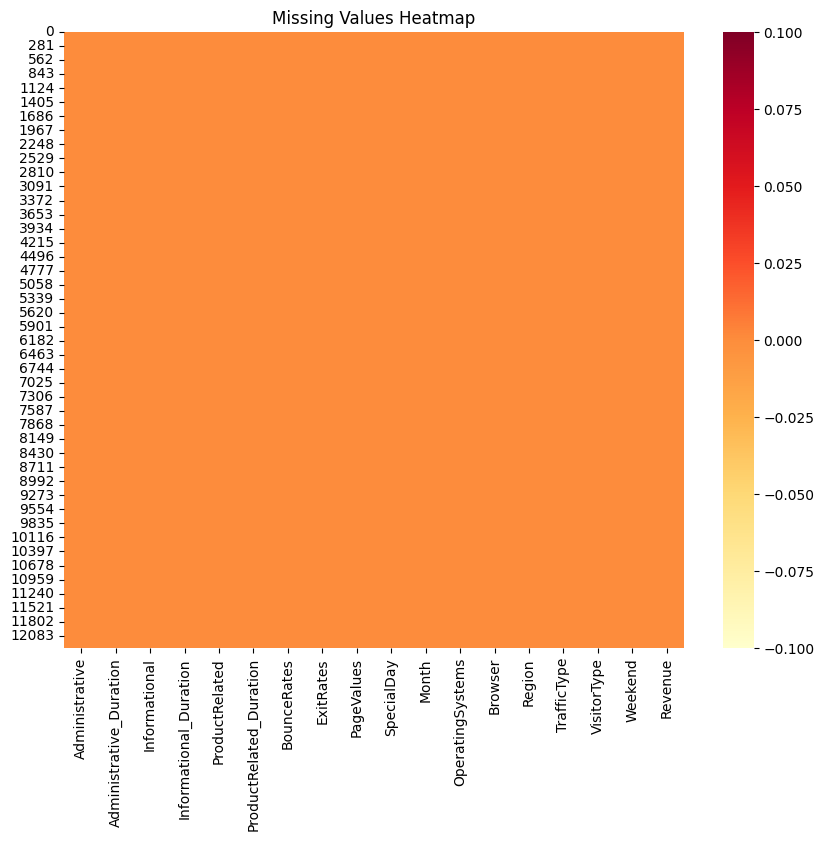

In [18]:
# heatmap for identifying any missing values in all columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap="YlOrRd")
plt.title('Missing Values Heatmap')
plt.show()

In [19]:
# datatype infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<Axes: >

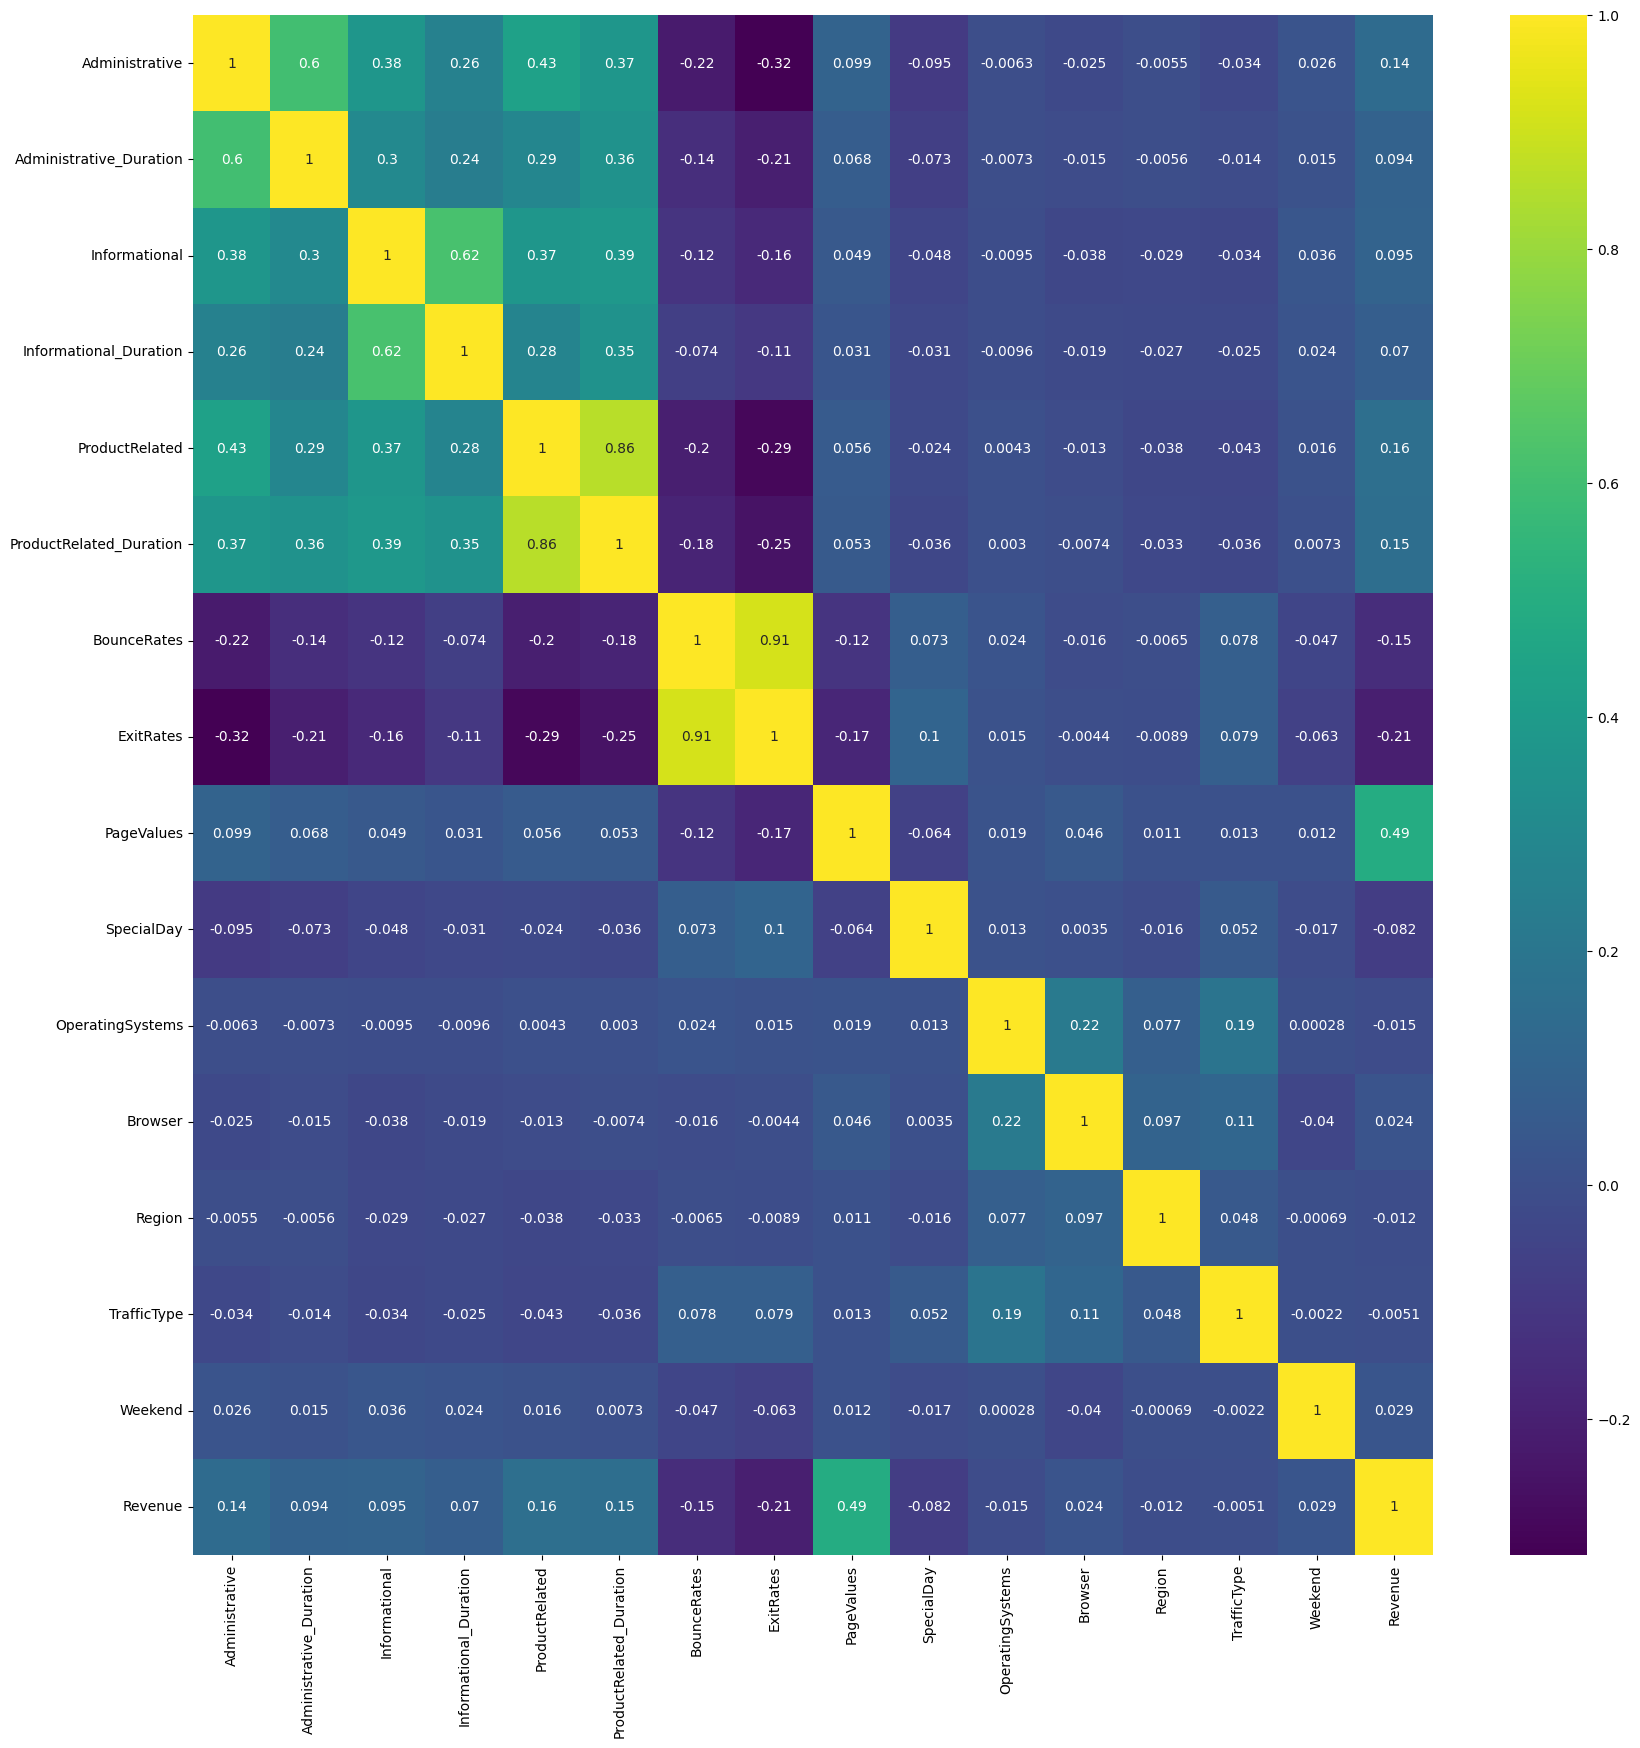

In [20]:
#correlation matrix
df_numeric=df._get_numeric_data()
corr = df_numeric.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap="viridis", annot=True)

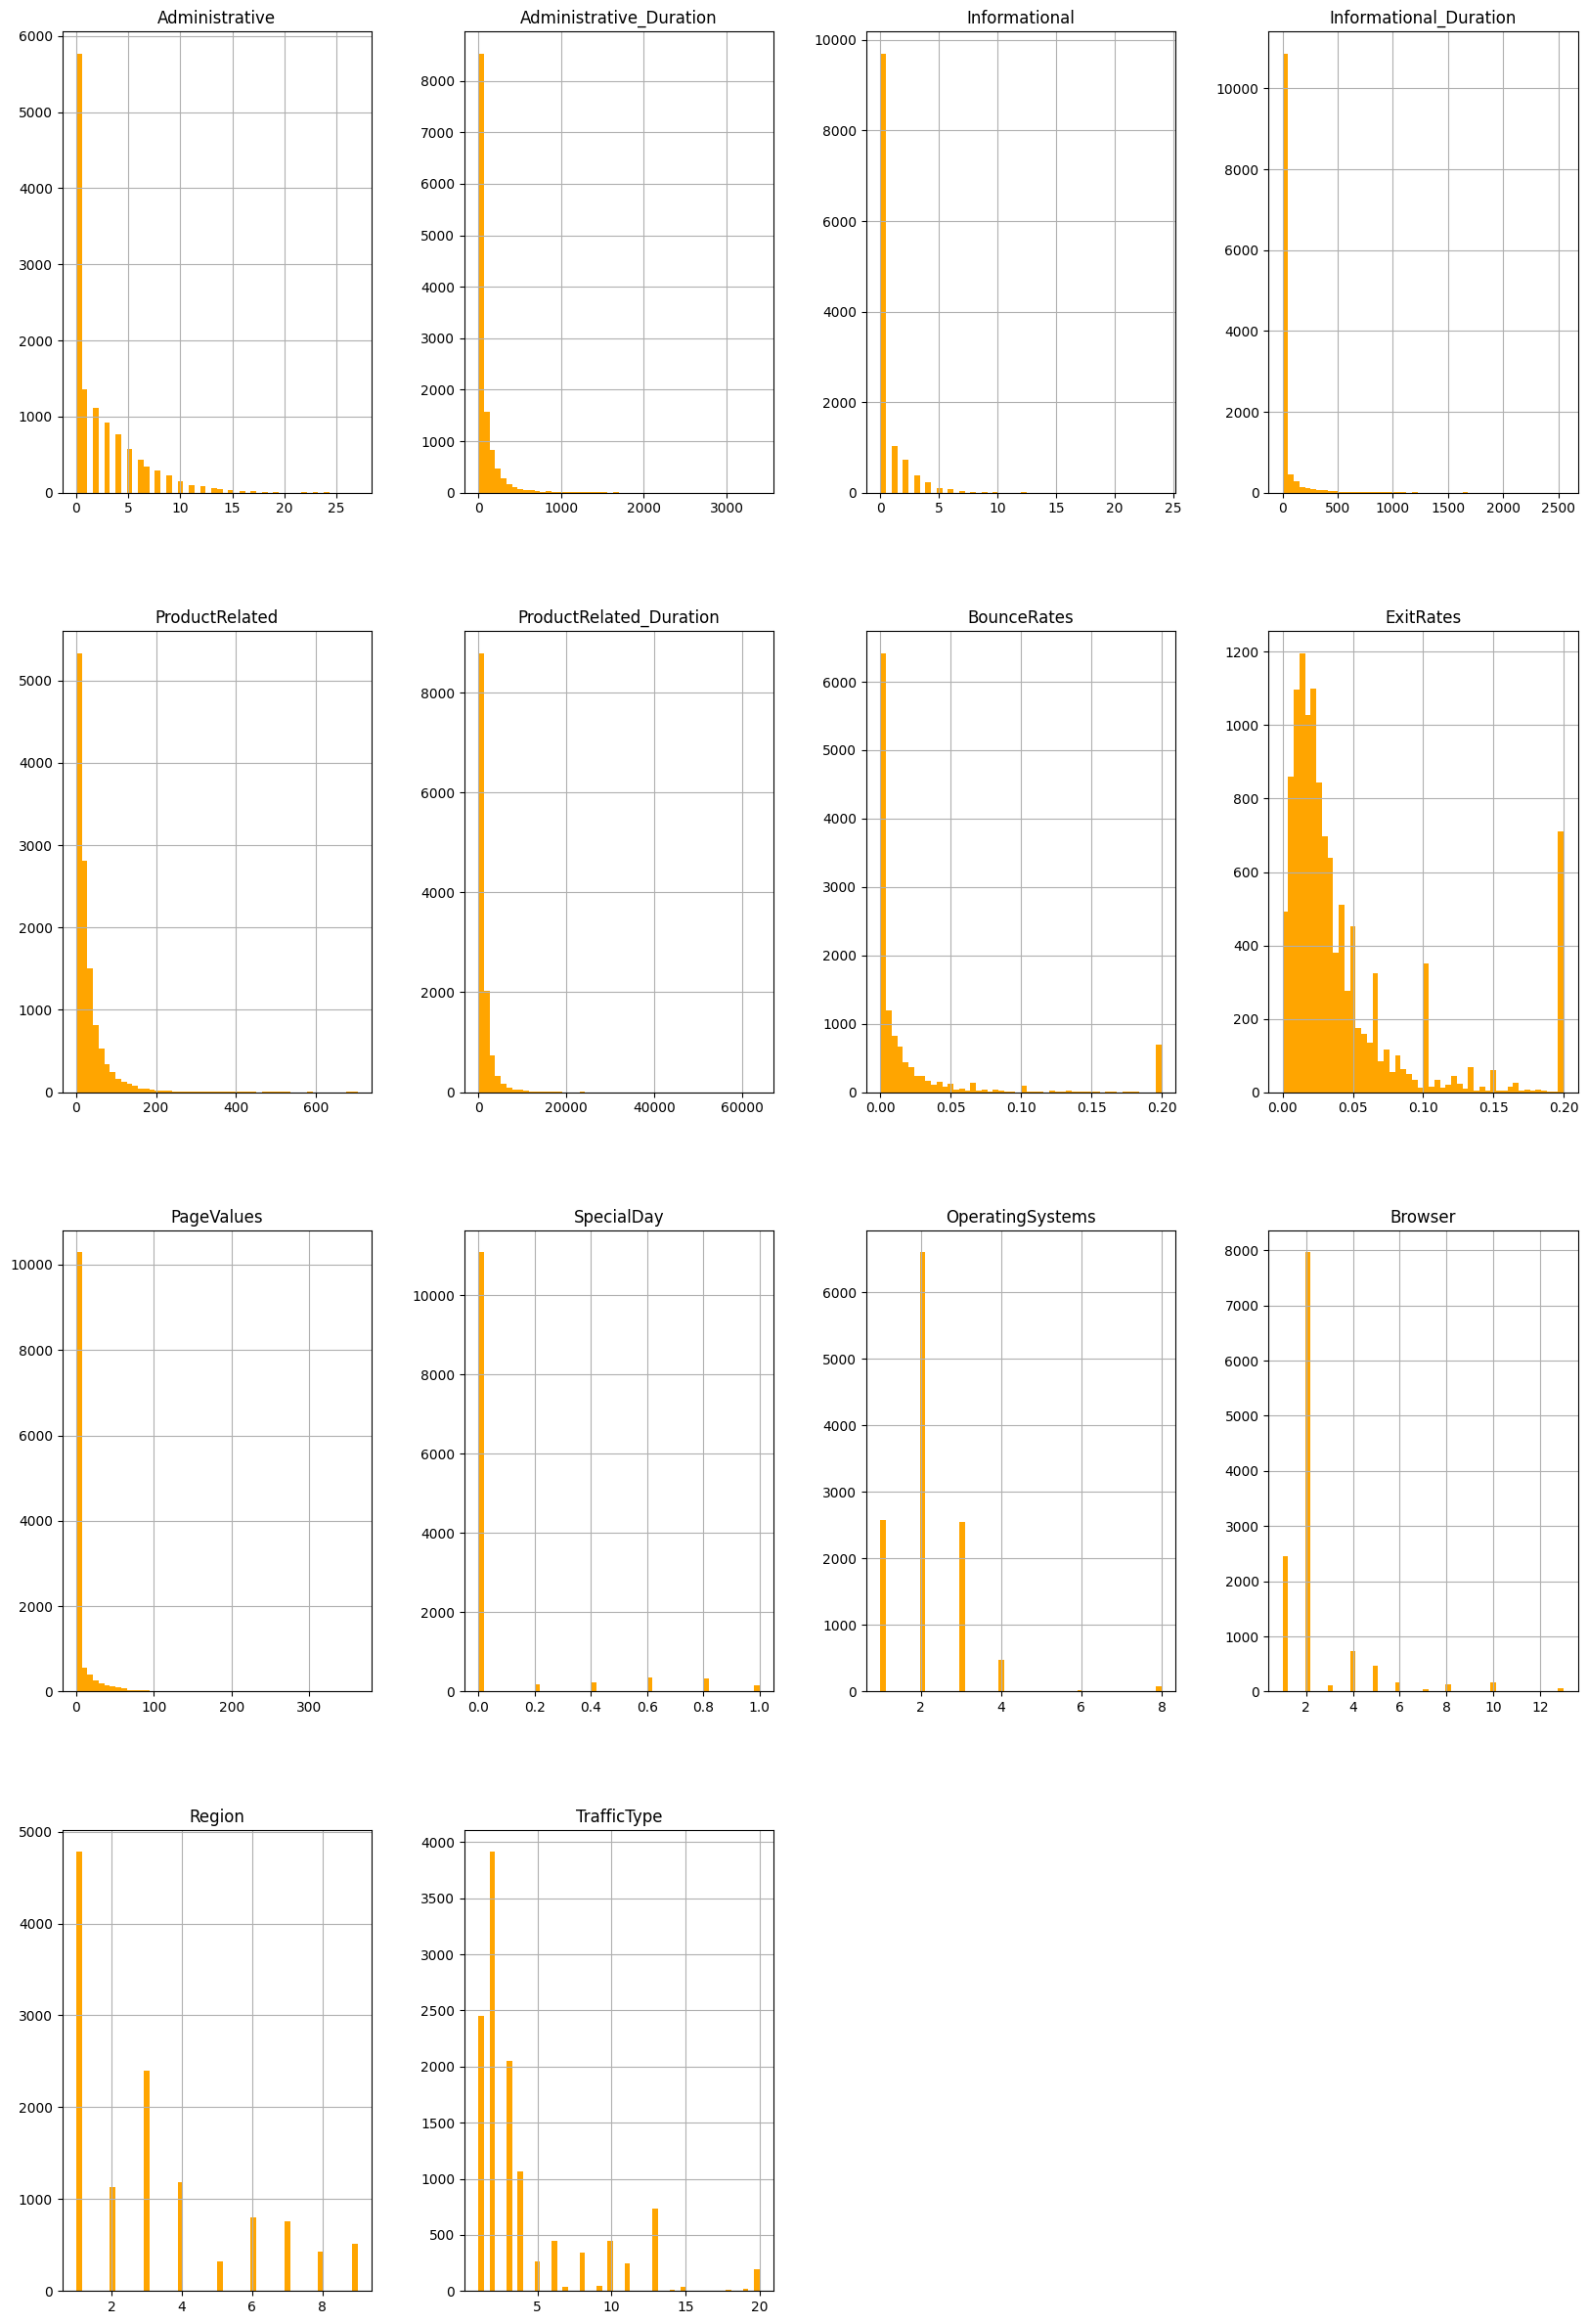

In [21]:
#histogram of columns
df_numeric.hist(figsize=(20,30), color='orange' ,bins=50, xlabelsize=10, ylabelsize=10);

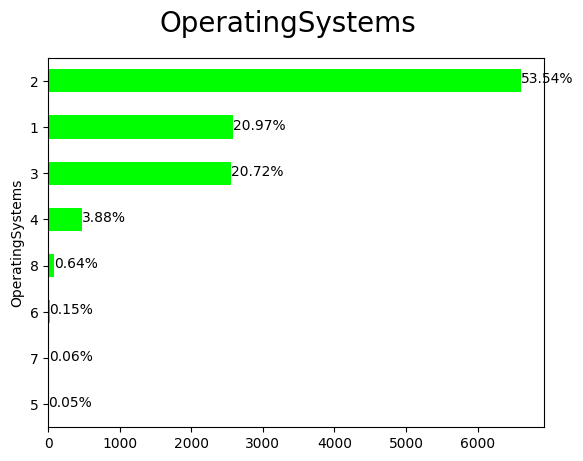

In [22]:
# count of Operarting Systems
x = "OperatingSystems"
ax = df[x].value_counts().sort_values().plot(kind="barh", color='lime')
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.suptitle(x, fontsize=20)
plt.show()

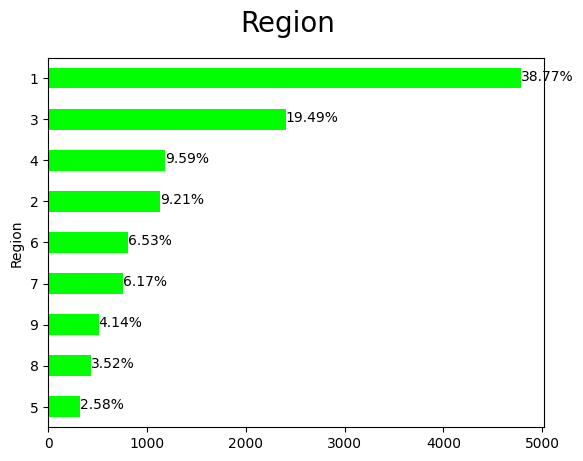

In [23]:
# count of regions
x = "Region"
ax = df[x].value_counts().sort_values().plot(kind="barh", color='lime')
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.suptitle(x, fontsize=20)
plt.show()

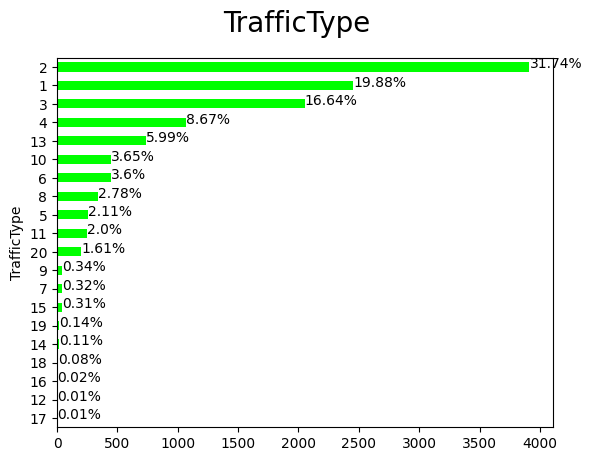

In [24]:
# count of traffic type
x = "TrafficType"
ax = df[x].value_counts().sort_values().plot(kind="barh", color='lime')
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.suptitle(x, fontsize=20)
plt.show()

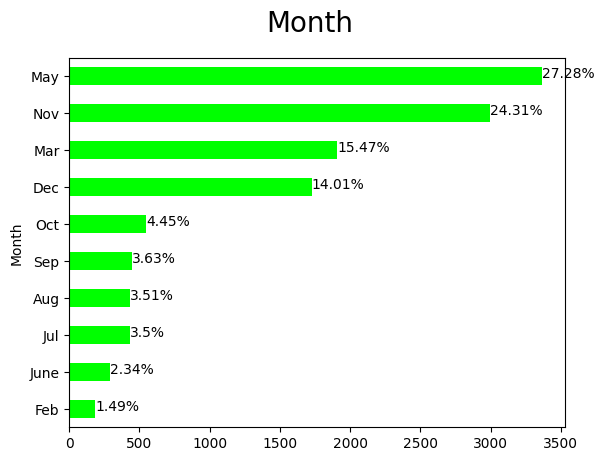

In [25]:
# count of entries by month
x = "Month"
ax = df[x].value_counts().sort_values().plot(kind="barh", color='lime')
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.suptitle(x, fontsize=20)
plt.show()

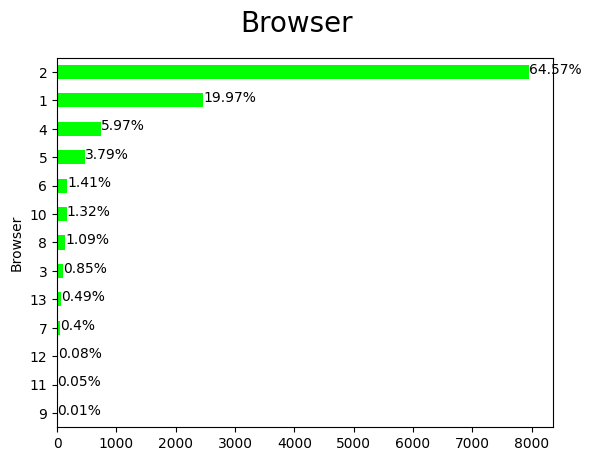

In [26]:
# count of browsers
x = "Browser"
ax = df[x].value_counts().sort_values().plot(kind="barh", color='lime')
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.suptitle(x, fontsize=20)
plt.show()

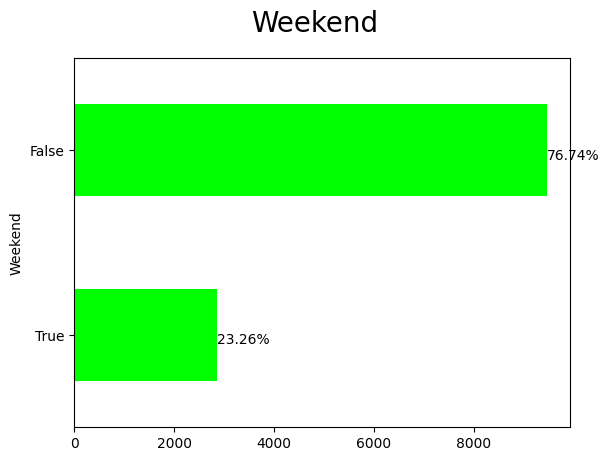

In [27]:
# count of weekend
x = "Weekend"
ax = df[x].value_counts().sort_values().plot(kind="barh", color='lime')
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.suptitle(x, fontsize=20)
plt.show()

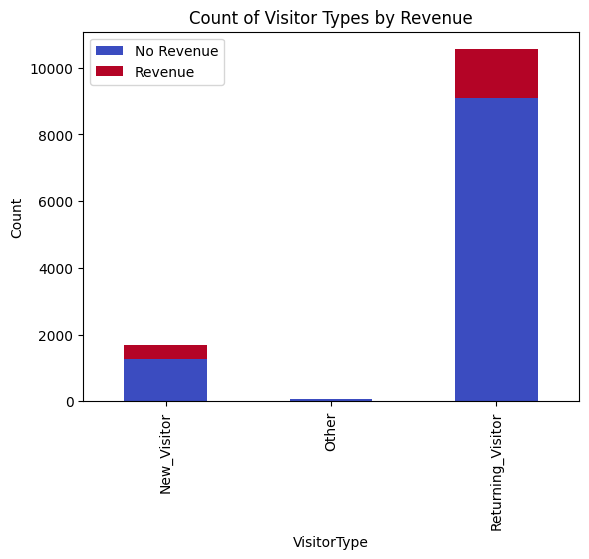

In [28]:
grouped_data = df.groupby(['VisitorType', 'Revenue']).size().reset_index(name='Count')
pivot_data = grouped_data.pivot_table(index='VisitorType', columns='Revenue', values='Count').fillna(0)
pivot_data.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('VisitorType')
plt.ylabel('Count')
plt.title('Count of Visitor Types by Revenue')
plt.legend(['No Revenue', 'Revenue'])
plt.show()

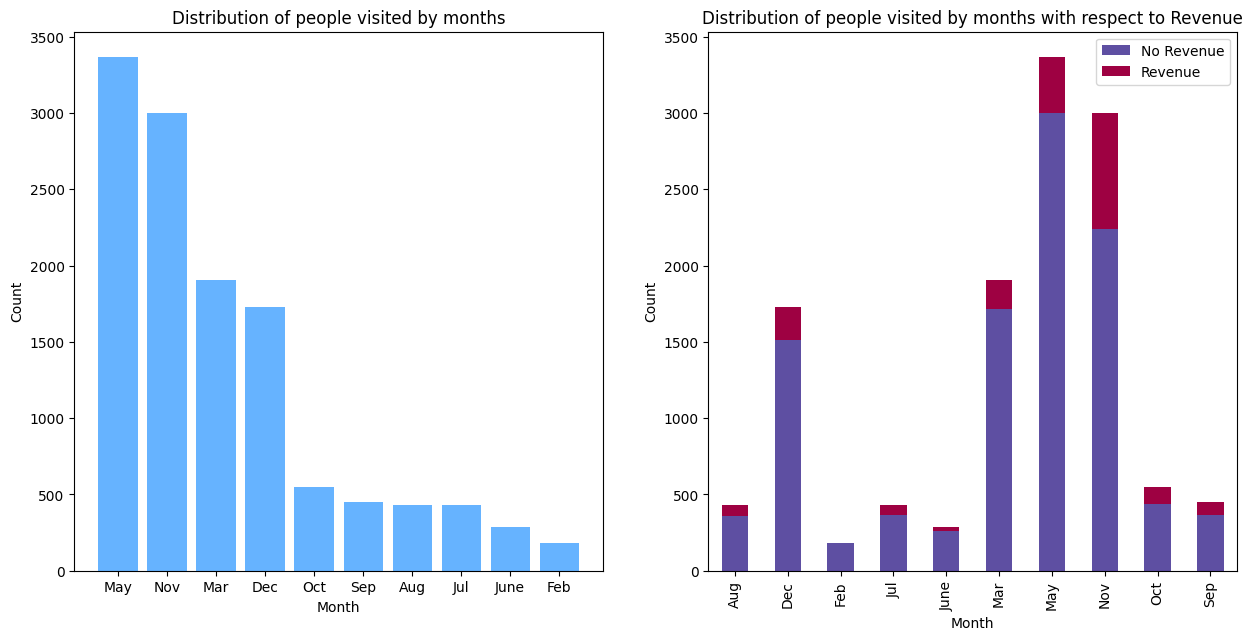

In [29]:
month_counts = df['Month'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.set_title('Distribution of people visited by months')
ax1.bar(month_counts.index, month_counts, color='#66b3ff')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')

ax2.set_title('Distribution of people visited by months with respect to Revenue')

grouped_data = df.groupby(['Month', 'Revenue']).size().reset_index(name='Count')

pivot_data = grouped_data.pivot_table(index='Month', columns='Revenue', values='Count').fillna(0)

pivot_data.plot(kind='bar', stacked=True, colormap='Spectral_r', ax=ax2)

ax2.set_xlabel('Month')
ax2.set_ylabel('Count')
ax2.legend(['No Revenue', 'Revenue'])
plt.show()

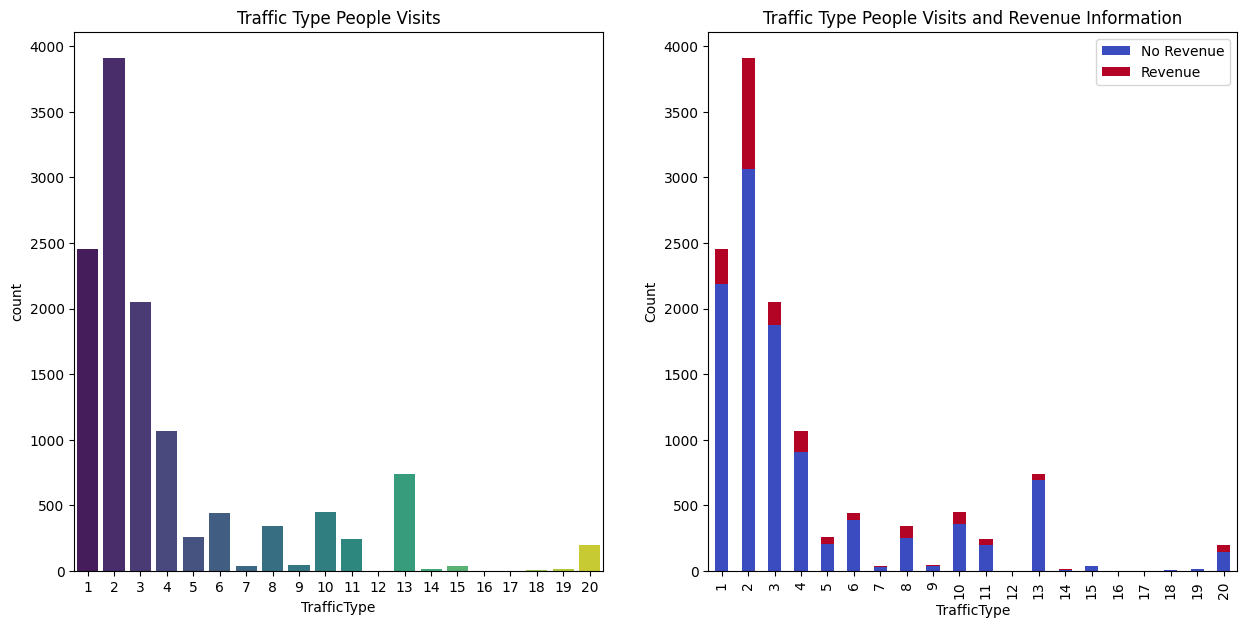

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.set_title('Traffic Type People Visits')
sns.countplot(x=df['TrafficType'], palette='viridis', ax=ax1)
ax2.set_title('Traffic Type People Visits and Revenue Information')
grouped_data = df.groupby(['TrafficType', 'Revenue']).size().reset_index(name='Count')
pivot_data = grouped_data.pivot_table(index='TrafficType', columns='Revenue', values='Count').fillna(0)
pivot_data.plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax2)
ax2.set_xlabel('TrafficType')
ax2.set_ylabel('Count')
ax2.legend(['No Revenue', 'Revenue'])
plt.show()

In [31]:
# replacing true and false values with 1 and 0
df['Revenue'] = df['Revenue'].replace({False: 0, True: 1})
revenue_counts = df['Revenue'].value_counts()
print(revenue_counts)

df['Weekend'] = df['Weekend'].replace({False: 0, True: 1})
weekend_counts = df['Weekend'].value_counts()
print(weekend_counts)

Revenue
0    10422
1     1908
Name: count, dtype: int64
Weekend
0    9462
1    2868
Name: count, dtype: int64


In [32]:
# encoding categorical variables using Label Encoder
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le_month = LabelEncoder()
le_visitor_type = LabelEncoder()
df['Month_encoded'] = le_month.fit_transform(df['Month'])
df['VisitorType_encoded'] = le_visitor_type.fit_transform(df['VisitorType'])
df = df.drop(['Month', 'VisitorType'], axis=1)
print(df.shape)

(12330, 18)


In [33]:
X = df.drop(columns='Revenue')
y = df['Revenue']

In [34]:
# train-test split for machine learning models
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state=3,test_size=0.20)

Accuracy: 0.9140
Precision: 0.7451
Recall: 0.6298
F1 Score: 0.6826
ROC AUC Score: 0.7964
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2104
           1       0.75      0.63      0.68       362

    accuracy                           0.91      2466
   macro avg       0.84      0.80      0.82      2466
weighted avg       0.91      0.91      0.91      2466



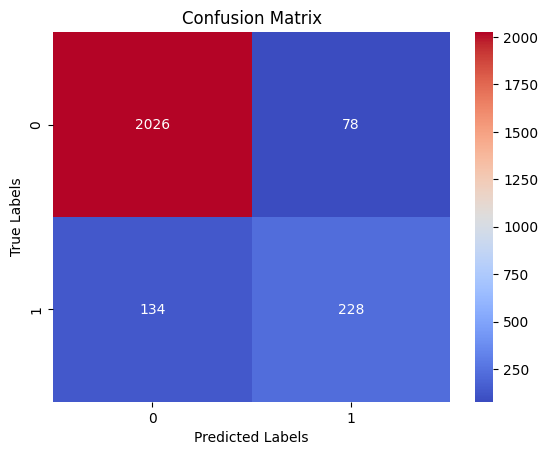

In [35]:
# GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
gb_clf = GradientBoostingClassifier(random_state=42)

# fit the classifier to the training data
gb_clf.fit(train_X, train_y)

# make predictions on the testing data
y_pred = gb_clf.predict(valid_X)

# calculate evaluation metrics
accuracy = accuracy_score(valid_y, y_pred)
precision = precision_score(valid_y, y_pred)
recall = recall_score(valid_y, y_pred)
f1 = f1_score(valid_y, y_pred)
roc_auc = roc_auc_score(valid_y, y_pred)
confusion_mat = confusion_matrix(valid_y, y_pred)
classification_rep = classification_report(valid_y, y_pred)

# print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC AUC Score: {:.4f}".format(roc_auc))
print(classification_rep)

#confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="coolwarm", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.9055
Precision: 0.7216
Recall: 0.5801
F1 Score: 0.6432
ROC AUC Score: 0.7708
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2104
           1       0.72      0.58      0.64       362

    accuracy                           0.91      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.90      0.91      0.90      2466



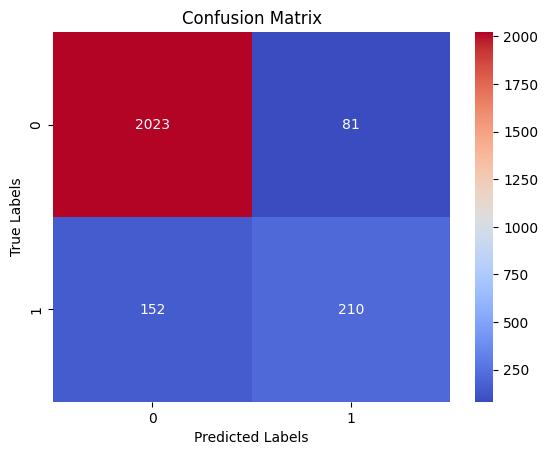

In [36]:
# XGBoost Classifier
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(random_state=42)

# fit the classifier to the training data
xgb_clf.fit(train_X, train_y)

# make predictions on the testing data
y_pred = xgb_clf.predict(valid_X)

# calculate evaluation metrics
accuracy = accuracy_score(valid_y, y_pred)
precision = precision_score(valid_y, y_pred)
recall = recall_score(valid_y, y_pred)
f1 = f1_score(valid_y, y_pred)
roc_auc = roc_auc_score(valid_y, y_pred)
confusion_mat = confusion_matrix(valid_y, y_pred)
classification_rep = classification_report(valid_y, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC AUC Score: {:.4f}".format(roc_auc))
print(classification_rep)

#confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="coolwarm", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.8548
Precision: 1.0000
Recall: 0.0110
F1 Score: 0.0219
ROC AUC Score: 0.5055
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2104
           1       1.00      0.01      0.02       362

    accuracy                           0.85      2466
   macro avg       0.93      0.51      0.47      2466
weighted avg       0.88      0.85      0.79      2466



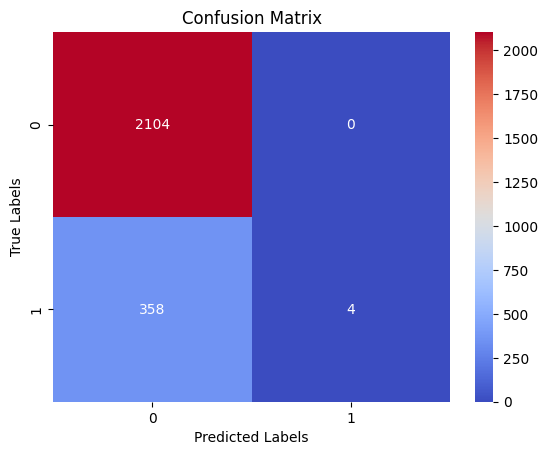

In [37]:
# SVC model
from sklearn.svm import SVC
svm_clf = SVC()

# Fit the model to the training data
svm_clf.fit(train_X, train_y)

# Predict labels for validation set
y_pred = svm_clf.predict(valid_X)

# calculate evaluation metrics
accuracy = accuracy_score(valid_y, y_pred)
precision = precision_score(valid_y, y_pred)
recall = recall_score(valid_y, y_pred)
f1 = f1_score(valid_y, y_pred)
roc_auc = roc_auc_score(valid_y, y_pred)
confusion_mat = confusion_matrix(valid_y, y_pred)
classification_rep = classification_report(valid_y, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC AUC Score: {:.4f}".format(roc_auc))
print(classification_rep)

#confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="coolwarm", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.8824
Precision: 0.5947
Recall: 0.6243
F1 Score: 0.6092
ROC AUC Score: 0.7756
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2104
           1       0.59      0.62      0.61       362

    accuracy                           0.88      2466
   macro avg       0.76      0.78      0.77      2466
weighted avg       0.88      0.88      0.88      2466



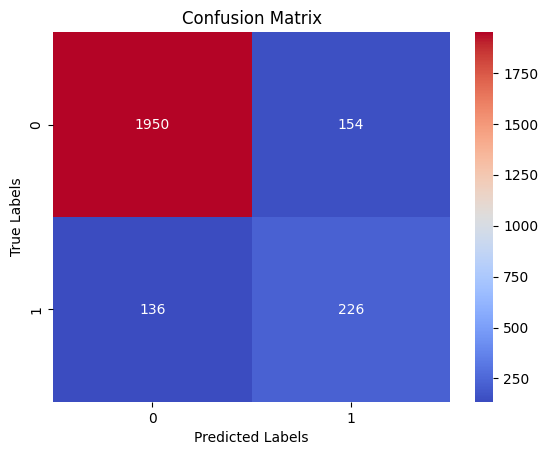

In [38]:
# Mutinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()

# Fit the model to the training data
nb_clf.fit(train_X, train_y)

# Predict labels for validation set
y_pred = nb_clf.predict(valid_X)

# calculate evaluation metrics
accuracy = accuracy_score(valid_y, y_pred)
precision = precision_score(valid_y, y_pred)
recall = recall_score(valid_y, y_pred)
f1 = f1_score(valid_y, y_pred)
roc_auc = roc_auc_score(valid_y, y_pred)
confusion_mat = confusion_matrix(valid_y, y_pred)
classification_rep = classification_report(valid_y, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC AUC Score: {:.4f}".format(roc_auc))
print(classification_rep)

#confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="coolwarm", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.8933
Precision: 0.6737
Recall: 0.5304
F1 Score: 0.5935
ROC AUC Score: 0.7431
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2104
           1       0.67      0.53      0.59       362

    accuracy                           0.89      2466
   macro avg       0.80      0.74      0.77      2466
weighted avg       0.89      0.89      0.89      2466



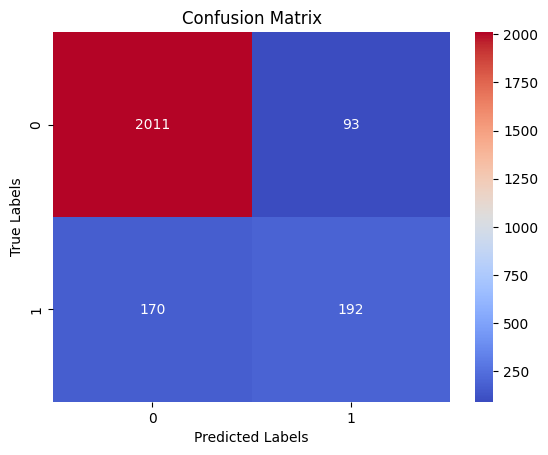

In [39]:
# Bagging Classifier model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
base_clf = DecisionTreeClassifier()

# Create a Bagging Classifier object
bag_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=10, random_state=42)

# Fit the model to the training data
bag_clf.fit(train_X, train_y)

# Predict labels for validation set
y_pred = bag_clf.predict(valid_X)

# calculate evaluation metrics
accuracy = accuracy_score(valid_y, y_pred)
precision = precision_score(valid_y, y_pred)
recall = recall_score(valid_y, y_pred)
f1 = f1_score(valid_y, y_pred)
roc_auc = roc_auc_score(valid_y, y_pred)
confusion_mat = confusion_matrix(valid_y, y_pred)
classification_rep = classification_report(valid_y, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC AUC Score: {:.4f}".format(roc_auc))
print(classification_rep)

#confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="coolwarm", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.8731
Precision: 0.5650
Recall: 0.5884
F1 Score: 0.5765
ROC AUC Score: 0.7552
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2104
           1       0.56      0.59      0.58       362

    accuracy                           0.87      2466
   macro avg       0.75      0.76      0.75      2466
weighted avg       0.88      0.87      0.87      2466



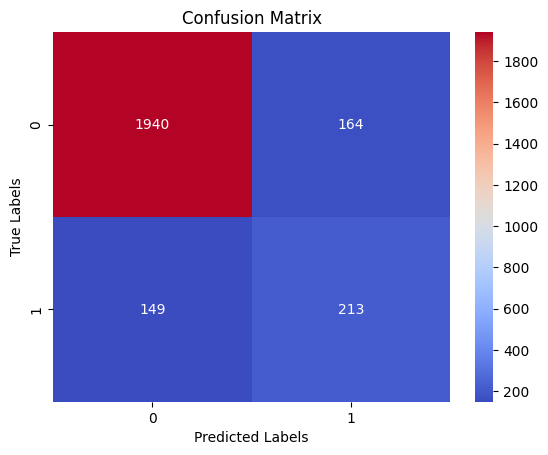

In [40]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ase_clf = DecisionTreeClassifier()

# Create an AdaBoost Classifier object
boost_clf = AdaBoostClassifier(base_estimator=base_clf, 
                               n_estimators=10, random_state=42)

# Fit the model to the training data
boost_clf.fit(train_X, train_y)

# Predict labels for validation set
y_pred = boost_clf.predict(valid_X)

# calculate evaluation metrics
accuracy = accuracy_score(valid_y, y_pred)
precision = precision_score(valid_y, y_pred)
recall = recall_score(valid_y, y_pred)
f1 = f1_score(valid_y, y_pred)
roc_auc = roc_auc_score(valid_y, y_pred)
confusion_mat = confusion_matrix(valid_y, y_pred)
classification_rep = classification_report(valid_y, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC AUC Score: {:.4f}".format(roc_auc))
print(classification_rep)

#confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="coolwarm", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [41]:
# It seems like Gradient Boosting Classifier is the best model 
#among this and has an accuracy of 91.40 % but the 
# roc auc score is only 0.79. Hence, i am using stratified 
#k fold cross validation to try to increase the roc auc
# score so that the model gets better at predicting Revenue.

In [42]:
# Stratified (K=10) fold Gradient Boosting Classifier 
#for better accuracy, precision, and roc auc score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize gradient boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

# Lists to store the scores and confusion matrices of each fold
roc_auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
cms = []

for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}")
    train_X, train_y = X.iloc[train_idx], y.iloc[train_idx]
    valid_X, valid_y = X.iloc[valid_idx], y.iloc[valid_idx]

    # Train the gradient boosting classifier on the training data
    gbc.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = gbc.predict(valid_X)
    y_pred_proba = gbc.predict_proba(valid_X)[:, 1]

    # Calculate the scores
    roc_auc = roc_auc_score(valid_y, y_pred_proba)
    precision = precision_score(valid_y, y_pred, average='weighted')
    recall = recall_score(valid_y, y_pred, average='weighted')
    f1 = f1_score(valid_y, y_pred, average='weighted')
    cm = confusion_matrix(valid_y, y_pred)

    # Store the scores and confusion matrices
    roc_auc_scores.append(roc_auc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    cms.append(cm)

# Calculate the average scores
avg_roc_auc = np.mean(roc_auc_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print(f"Average ROC AUC score: {avg_roc_auc:.2f}")
print(f"Average precision score: {avg_precision:.2f}")
print(f"Average recall score: {avg_recall:.2f}")
print(f"Average F1 score: {avg_f1:.2f}")

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Average ROC AUC score: 0.93
Average precision score: 0.90
Average recall score: 0.90
Average F1 score: 0.90


In [43]:
# These stats look good after the cross 
#validation process and this model is good 
#for predicting Revenue.